In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt


In [2]:
# Load the dataset
file_path = r'C:\Users\powerX\Desktop\DATA SET\KO_1919-09-06_2025-04-06.csv'
df = pd.read_csv(file_path)

# View the first few rows of the dataset
df.head()


,date,open,high,low,close,adj_close,volume
0,1962-01-02 00:00:00-05:00,0.263021,0.270182,0.263021,0.263021,0.046041,806400
1,1962-01-03 00:00:00-05:00,0.259115,0.259115,0.253255,0.257161,0.045016,1574400
2,1962-01-04 00:00:00-05:00,0.257813,0.261068,0.257813,0.259115,0.045358,844800
3,1962-01-05 00:00:00-05:00,0.259115,0.262370,0.252604,0.253255,0.044332,1420800
4,1962-01-08 00:00:00-05:00,0.251302,0.251302,0.245768,0.250651,0.043876,2035200


In [3]:
# Check for missing values
df.isnull().sum()


date         0
open         0
high         0
low          0
close        0
adj_close    0
volume       0
dtype: int64

In [5]:
# Convert 'date' column to datetime with UTC support
df['date'] = pd.to_datetime(df['date'], utc=True)

# Verify the change
df.dtypes


date         datetime64[ns, UTC]
open                     float64
high                     float64
low                      float64
close                    float64
adj_close                float64
volume                     int64
dtype: object

In [6]:
# Remove duplicate rows
df = df.drop_duplicates()

# Verify the number of rows after dropping duplicates
df.shape


(15922, 7)

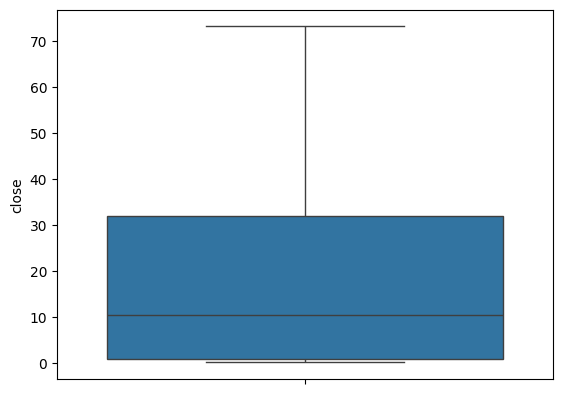

In [7]:
# Plot the distribution of 'close' prices
sns.boxplot(df['close'])
plt.show()

# Remove outliers (optional, based on the IQR method)
Q1 = df['close'].quantile(0.25)
Q3 = df['close'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['close'] >= (Q1 - 1.5 * IQR)) & (df['close'] <= (Q3 + 1.5 * IQR))]


In [8]:
# Convert columns to numeric (if they aren't already)
df['open'] = pd.to_numeric(df['open'], errors='coerce')
df['high'] = pd.to_numeric(df['high'], errors='coerce')
df['low'] = pd.to_numeric(df['low'], errors='coerce')
df['close'] = pd.to_numeric(df['close'], errors='coerce')
df['adj_close'] = pd.to_numeric(df['adj_close'], errors='coerce')
df['volume'] = pd.to_numeric(df['volume'], errors='coerce')


In [9]:
# Remove duplicate rows based on the 'date' column
df = df.drop_duplicates(subset='date')

# Verify the number of rows
df.shape


(15922, 7)

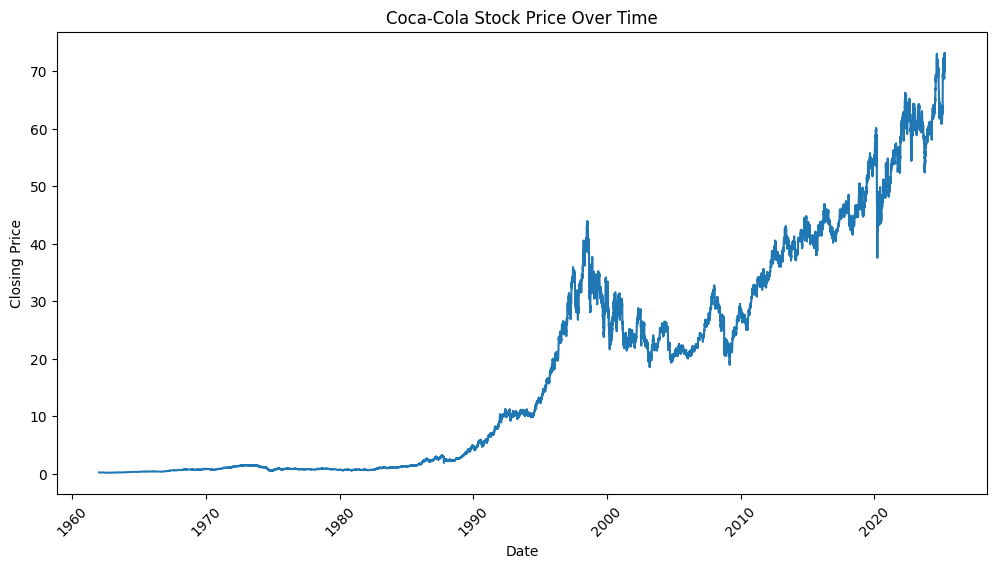

In [10]:
# Plot closing price over time
plt.figure(figsize=(12,6))
plt.plot(df['date'], df['close'])
plt.title('Coca-Cola Stock Price Over Time')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.xticks(rotation=45)  # Rotate date labels for better readability
plt.show()


In [11]:
# Save the cleaned dataset
cleaned_file_path = r'C:\Users\powerX\Desktop\DATA SET\KO_1919-09-06_2025-04-06_cleaned.csv'
df.to_csv(cleaned_file_path, index=False)


In [12]:
# Get basic statistical summary of the numerical columns
print(df.describe())


               open          high           low         close     adj_close  \
count  15922.000000  15922.000000  15922.000000  15922.000000  15922.000000   
mean      18.450788     18.598529     18.299819     18.455364     12.831326   
std       19.432024     19.570869     19.288910     19.434456     16.645812   
min        0.192708      0.193359      0.182292      0.192057      0.034086   
25%        0.888021      0.895833      0.880208      0.888021      0.223808   
50%       10.531250     10.625000     10.468750     10.531250      4.824283   
75%       31.946876     32.355938     31.591562     31.968750     17.404522   
max       73.300003     73.949997     72.320000     73.180000     73.180000   

             volume  
count  1.592200e+04  
mean   9.334420e+06  
std    7.954781e+06  
min    7.680000e+04  
25%    3.111600e+06  
50%    8.087650e+06  
75%    1.329548e+07  
max    1.241690e+08  


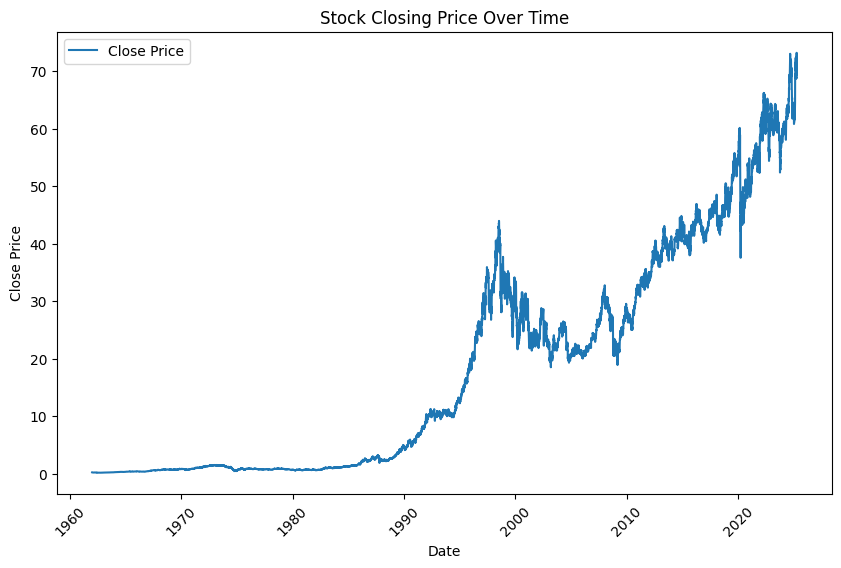

In [13]:
import matplotlib.pyplot as plt

# Plotting the closing price over time
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'], label='Close Price')
plt.title('Stock Closing Price Over Time')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.xticks(rotation=45)
plt.legend()
plt.show()


C:\Users\powerX\AppData\Local\Programs\Python\Python313\Lib\site-packages\mplfinance\_arg_validators.py:84: UserWarning: 


            POSSIBLE TO SEE DETAILS (Candles, Ohlc-Bars, Etc.)
   For more information see:
   - https://github.com/matplotlib/mplfinance/wiki/Plotting-Too-Much-Data
   
   TO SILENCE THIS WARNING, set `type='line'` in `mpf.plot()`
   OR set kwarg `warn_too_much_data=N` where N is an integer 
   LARGER than the number of data points you want to plot.

  warnings.warn('\n\n ================================================================= '+


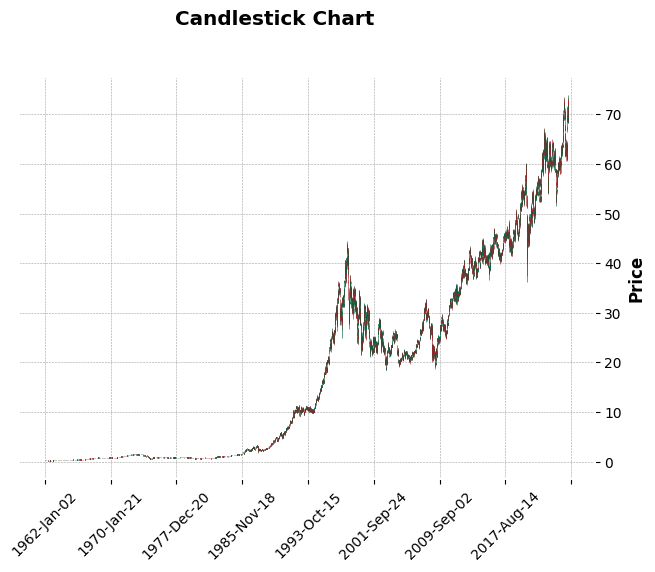

In [16]:
import mplfinance as mpf

# Convert DataFrame to the format required by mplfinance
df.set_index('date', inplace=True)
df = df[['open', 'high', 'low', 'close']]

# Plot the candlestick chart
mpf.plot(df, type='candle', style='charles', title='Candlestick Chart', ylabel='Price')


In [15]:
!pip install mplfinance



[notice] A new release of pip is available: 25.0.1 -> 25.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [18]:
df.reset_index(inplace=True)


In [19]:
df['date'] = pd.to_datetime(df['date'])


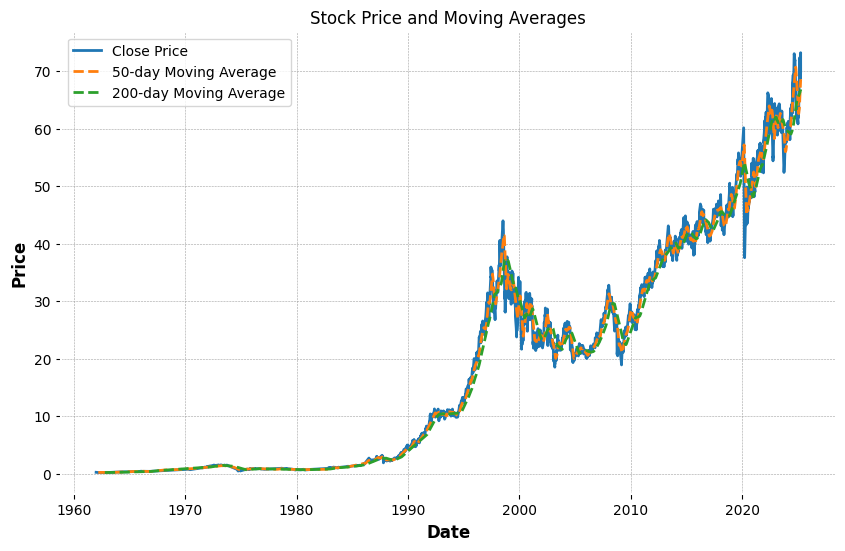

In [20]:
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['close'], label='Close Price')
plt.plot(df['date'], df['50_MA'], label='50-day Moving Average', linestyle='--')
plt.plot(df['date'], df['200_MA'], label='200-day Moving Average', linestyle='--')
plt.legend()
plt.title("Stock Price and Moving Averages")
plt.xlabel("Date")
plt.ylabel("Price")
plt.show()


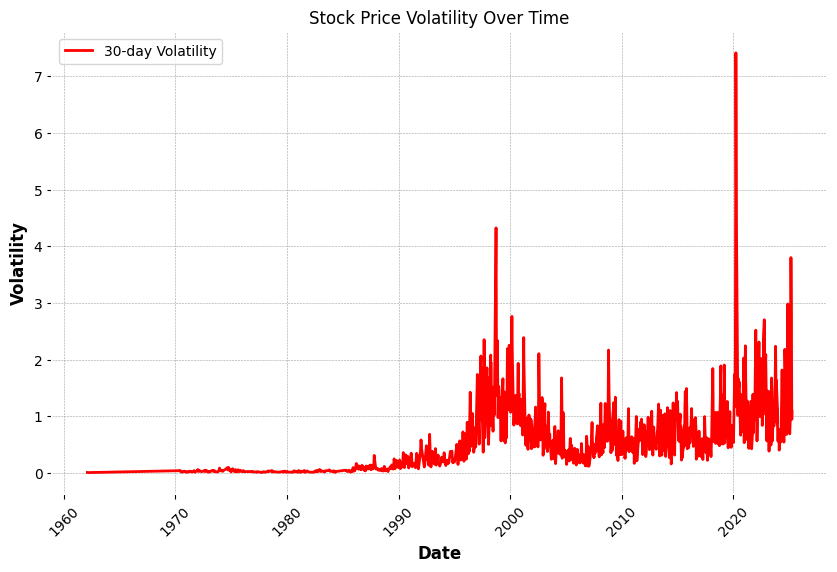

In [21]:
# Calculate rolling standard deviation (volatility)
df['volatility'] = df['close'].rolling(window=30).std()

# Plot the volatility over time
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['volatility'], label='30-day Volatility', color='red')
plt.title('Stock Price Volatility Over Time')
plt.xlabel('Date')
plt.ylabel('Volatility')
plt.xticks(rotation=45)
plt.legend()
plt.show()


In [24]:
import pandas as pd

# Assuming 'df' is already loaded and contains the relevant columns

# Get the correlation matrix of the specified columns
correlation = df[['open', 'high', 'low', 'close', '50_MA', '200_MA', 'volatility']].corr()

# Print the correlation matrix
print(correlation)


                open      high       low     close     50_MA    200_MA  \
open        1.000000  0.999946  0.999937  0.999893  0.998120  0.994831   
high        0.999946  1.000000  0.999915  0.999947  0.998175  0.994933   
low         0.999937  0.999915  1.000000  0.999947  0.997937  0.994592   
close       0.999893  0.999947  0.999947  1.000000  0.998004  0.994719   
50_MA       0.998120  0.998175  0.997937  0.998004  1.000000  0.997174   
200_MA      0.994831  0.994933  0.994592  0.994719  0.997174  1.000000   
volatility  0.719052  0.721087  0.716594  0.718884  0.731724  0.735949   

            volatility  
open          0.719052  
high          0.721087  
low           0.716594  
close         0.718884  
50_MA         0.731724  
200_MA        0.735949  
volatility    1.000000  


In [23]:
print(df.columns)


Index(['date', 'open', 'high', 'low', 'close', '50_MA', '200_MA',
       'volatility'],
      dtype='object')


In [26]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Use the 'close' price as the target variable
X = df[['open', 'high', 'low']]  # Features (excluding 'volume' if it's missing)
y = df['close']  # Target variable

# Split data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')


Mean Squared Error: 0.020149003851718673


C:\Users\powerX\AppData\Local\Temp\ipykernel_6964\3595281827.py:11: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  df['date'] = pd.to_datetime(df['date'])


Anomalies detected:
Empty DataFrame
Columns: [date, close, zscore]
Index: []



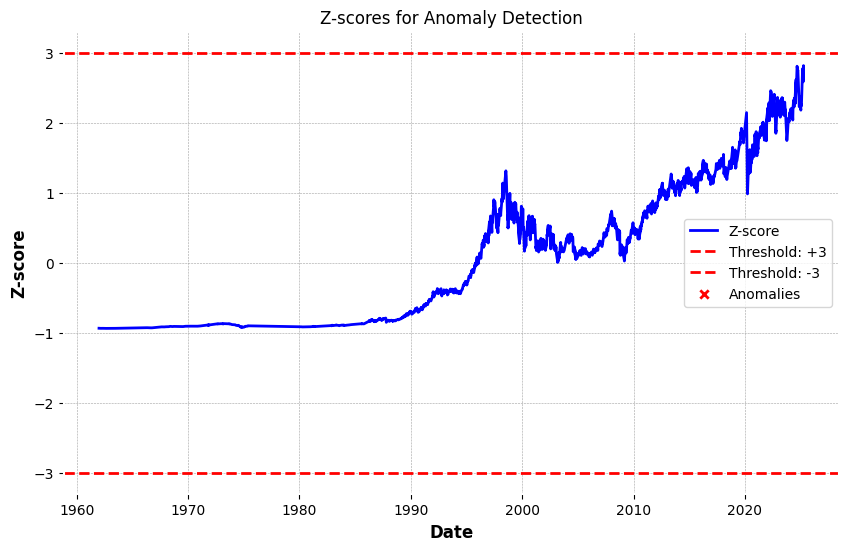

In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import zscore

# Load your data
file_path = r'C:\Users\powerX\Desktop\DATA SET\KO_1919-09-06_2025-04-06.csv'
df = pd.read_csv(file_path)

# Convert the 'date' column to datetime if it's not already
df['date'] = pd.to_datetime(df['date'])

# Calculate 50-day and 200-day Moving Averages
df['50_MA'] = df['close'].rolling(window=50).mean()
df['200_MA'] = df['close'].rolling(window=200).mean()

# Calculate the volatility (standard deviation of the 'close' price over a rolling window)
df['volatility'] = df['close'].rolling(window=50).std()

# Calculate Z-scores for the 'close' column (you can change this to another feature if you prefer)
df['zscore'] = zscore(df['close'].dropna())

# Set a threshold for detecting anomalies based on Z-score
threshold = 3  # Z-score threshold, anomalies typically have abs(zscore) > 3

# Identify anomalies where the Z-score exceeds the threshold
anomalies = df[df['zscore'].abs() > threshold]

# Output anomalies
print(f"Anomalies detected:\n{anomalies[['date', 'close', 'zscore']]}\n")

# Plot the Z-scores and highlight anomalies
plt.figure(figsize=(10, 6))
plt.plot(df['date'], df['zscore'], label='Z-score', color='blue')
plt.axhline(y=threshold, color='r', linestyle='--', label='Threshold: +3')
plt.axhline(y=-threshold, color='r', linestyle='--', label='Threshold: -3')

# Plot the anomalies
plt.scatter(anomalies['date'], anomalies['zscore'], color='red', label='Anomalies', marker='x')

# Set plot labels and title
plt.xlabel('Date')
plt.ylabel('Z-score')
plt.title('Z-scores for Anomaly Detection')
plt.legend()

# Display the plot
plt.show()


In [29]:
# Calculate RSI (14-day)
def calculate_rsi(df, window=14):
    delta = df['close'].diff()
    gain = (delta.where(delta > 0, 0)).rolling(window=window).mean()
    loss = (-delta.where(delta < 0, 0)).rolling(window=window).mean()
    rs = gain / loss
    rsi = 100 - (100 / (1 + rs))
    return rsi

df['RSI'] = calculate_rsi(df)
print(df[['date', 'close', 'RSI']].tail())


                            date      close        RSI
15917  2025-03-31 00:00:00-04:00  71.620003  53.179836
15918  2025-04-01 00:00:00-04:00  71.870003  61.668689
15919  2025-04-02 00:00:00-04:00  71.330002  60.070669
15920  2025-04-03 00:00:00-04:00  73.180000  70.344118
15921  2025-04-04 00:00:00-04:00  69.930000  49.219382


In [30]:
import plotly.graph_objects as go

# Create a candlestick chart
fig = go.Figure(data=[go.Candlestick(x=df['date'],
                open=df['open'],
                high=df['high'],
                low=df['low'],
                close=df['close'],
                name="Candlesticks"),
            go.Scatter(x=df['date'], y=df['50_MA'], mode='lines', name="50-day MA"),
            go.Scatter(x=df['date'], y=df['200_MA'], mode='lines', name="200-day MA")
])

fig.update_layout(title='Candlestick Chart with Moving Averages', xaxis_title='Date', yaxis_title='Price')
fig.show()


ModuleNotFoundError: No module named 'plotly'

In [31]:
from scipy.stats import zscore

# Calculate Z-scores for the 'close' column
df['zscore'] = zscore(df['close'])

# Flag anomalies (Z-score > 3 or < -3)
anomalies = df[df['zscore'].abs() > 3]
print("Anomalies detected:")
print(anomalies[['date', 'close', 'zscore']].tail())


Anomalies detected:
Empty DataFrame
Columns: [date, close, zscore]
Index: []


In [32]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Prepare data
X = df[['open', 'high', 'low', 'volume']]  # Features
y = df['close']  # Target

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit Random Forest model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Feature importance
feature_importance = model.feature_importances_
print("Feature importance:", dict(zip(X.columns, feature_importance)))


Feature importance: {'open': np.float64(0.00982018563215465), 'high': np.float64(0.4312925199207573), 'low': np.float64(0.5588776823114998), 'volume': np.float64(9.612135588272078e-06)}


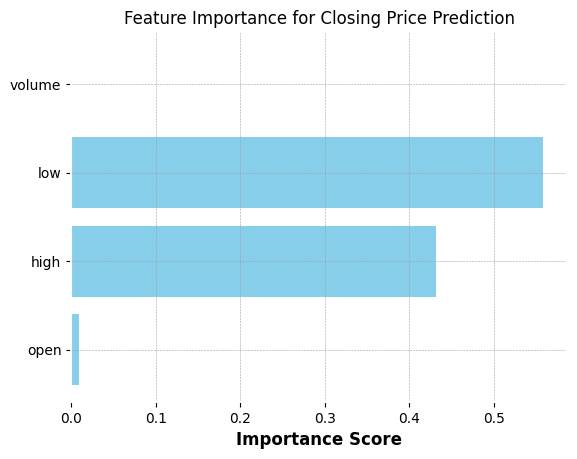

In [33]:
import matplotlib.pyplot as plt

importance = {'open': 0.0098, 'high': 0.4313, 'low': 0.5588, 'volume': 0.0000096}
plt.barh(list(importance.keys()), list(importance.values()), color='skyblue')
plt.xlabel('Importance Score')
plt.title('Feature Importance for Closing Price Prediction')
plt.show()


RuntimeError: `lowess=True` requires statsmodels, an optional dependency, to be installed.

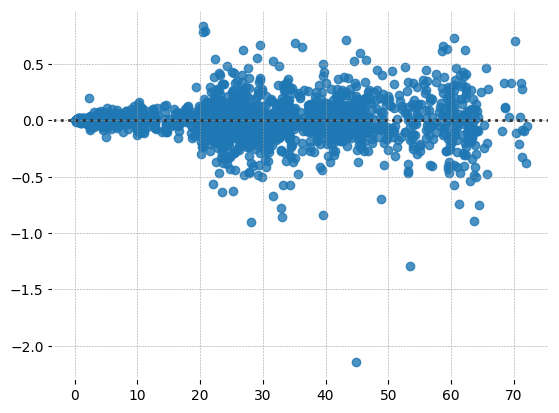

In [34]:
import seaborn as sns
sns.residplot(x=y_test, y=y_pred, lowess=True)
plt.xlabel('Actual Close Price')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()


In [35]:
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

from sklearn.metrics import mean_squared_error
print("Random Forest MSE:", mean_squared_error(y_test, rf_pred))


Random Forest MSE: 0.025164145507482083


In [38]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

# 1. Create lag features
df['close_lag1'] = df['close'].shift(1)
df['close_lag2'] = df['close'].shift(2)

# 2. Drop NaN rows caused by shifting
df.dropna(inplace=True)

# 3. Define features and target
features = ['open', 'high', 'low', 'close_lag1', 'close_lag2']
X = df[features]
y = df['close']

# 4. Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 5. Linear Regression
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
lr_pred = lr_model.predict(X_test)
lr_mse = mean_squared_error(y_test, lr_pred)
print("Linear Regression MSE with lag features:", lr_mse)

# 6. Random Forest
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_mse = mean_squared_error(y_test, rf_pred)
print("Random Forest MSE with lag features:", rf_mse)


Linear Regression MSE with lag features: 0.017692045133641778
Random Forest MSE with lag features: 0.02763481219494331


In [39]:
# Relative Strength Index (RSI)
delta = df['close'].diff()
gain = delta.where(delta > 0, 0)
loss = -delta.where(delta < 0, 0)
avg_gain = gain.rolling(14).mean()
avg_loss = loss.rolling(14).mean()
rs = avg_gain / avg_loss
df['RSI'] = 100 - (100 / (1 + rs))

# Exponential Moving Average
df['EMA_20'] = df['close'].ewm(span=20, adjust=False).mean()

# MACD
ema12 = df['close'].ewm(span=12, adjust=False).mean()
ema26 = df['close'].ewm(span=26, adjust=False).mean()
df['MACD'] = ema12 - ema26


In [40]:
df.dropna(inplace=True)  # Drop NaNs after adding indicators
X = df[['open', 'high', 'low', 'close_lag1', 'close_lag2', 'RSI', 'EMA_20', 'MACD']]
y = df['close']
